<b>Instalando e Carregando Pacotes</b>

In [1]:
#Instala o Pacote - Download dos datasets Imdb c/sqlite
!pip install -q imdb-sqlite

In [2]:
# Nome dos Paises formato ISO
!pip install -q pycountry

In [3]:
#importando os pacotes
# re - expressões regulares
import re
#time - tempo de execução, datas
import time
#sqlite3 - manipulação banco de dados
import sqlite3
#pycountry - Nome dos Paises formato ISO
import pycountry
#numpy - manipulação de dados
import numpy as np
#pandas - manipulação de dados (tabelas)
import pandas as pd
#matplotlib.pyplot  - graficos
import matplotlib.pyplot as plt
#seaborn - graficos
import seaborn as sns
#matplotlib (cm) - graficos
from matplotlib import cm
#sklearn ( countvectorizer) - machine learning - vetor para criar calculos
from sklearn.feature_extraction.text import CountVectorizer
#warning - alertas
import warnings
#ignorando os warnings
warnings.filterwarnings("ignore")
#definindo padrao do grafico
sns.set_theme(style = "whitegrid")

<b>CARREGANDO OS DADOS</b>

*baixando os dados*

In [4]:
#baixando os datasets
#%%time
!imdb-sqlite

2021-09-09 16:42:50,152 DB already exists: (imdb.db). Refusing to modify. Exiting


In [5]:
# Conecta no banco de dados
conn = sqlite3.connect("imdb.db")

In [6]:
#Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [7]:
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [8]:
#Convertendo o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [9]:
#Percorrendo a lista de tabelas no banco de dados e extrair o esquema de cada um
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-" * 100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




## 1- Quais são as Categorias de Filmes Mais Comuns no IMDB?
    
 *Quais são os principais tipos (categorias) dos Títulos (Filmes)?*

In [13]:
#Cria a consulta SQl
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [14]:
#Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [15]:
#Visualiza o resultado
display(resultado1)

,type,COUNT
0,movie,587325
1,radioEpisode,1
2,radioSeries,1
3,short,829939
4,tvEpisode,6050809
5,tvMiniSeries,39643
6,tvMovie,132856
7,tvPilot,1
8,tvSeries,214370
9,tvShort,10265


In [16]:
#Calculando o Percentual de cada tipo = cria uma coluna percentual pegando a (coluna COUNT / COUNT.sum()) * 100
resultado1['percentual'] = round((resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100,2)

In [17]:
#Visualizando o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,587325,7.12
1,radioEpisode,1,0.00
2,radioSeries,1,0.00
3,short,829939,10.06
4,tvEpisode,6050809,73.35
5,tvMiniSeries,39643,0.48
6,tvMovie,132856,1.61
7,tvPilot,1,0.00
8,tvSeries,214370,2.60
9,tvShort,10265,0.12


In [18]:
#Criando um gráfico com apenas 4 categorias:
#As 3 Categorias com mais títulos e 1 Categoria com todo o restante

#Cria um dicionario vazio
others ={}

#Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

#Gava o percentual
others['percentual']=resultado1[resultado1['percentual']< 5]['percentual'].sum()

#Ajusta o nome
others['type']='others'

In [19]:
#Visualiza a categoria others que contem as categorias com < de 5% numa soma total
display(others)

{'COUNT': 781124, 'percentual': 9.459999999999999, 'type': 'others'}

In [20]:
#Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual']>5]

In [21]:
#Append com o dataframe de outras outras categorias
resultado1 = resultado1.append(others, ignore_index =True)

In [22]:
#Ordena o resultado
resultado1 = resultado1.sort_values(by= 'COUNT', ascending= False)

In [23]:
# Visualiza
display(resultado1)

,type,COUNT,percentual
2,tvEpisode,6050809,73.35
1,short,829939,10.06
3,others,781124,9.46
0,movie,587325,7.12


In [24]:
# Ajusta os labels (list conphehension = lopping ) lê de tras para frente
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2))+'%'+']' for i in resultado1.index]

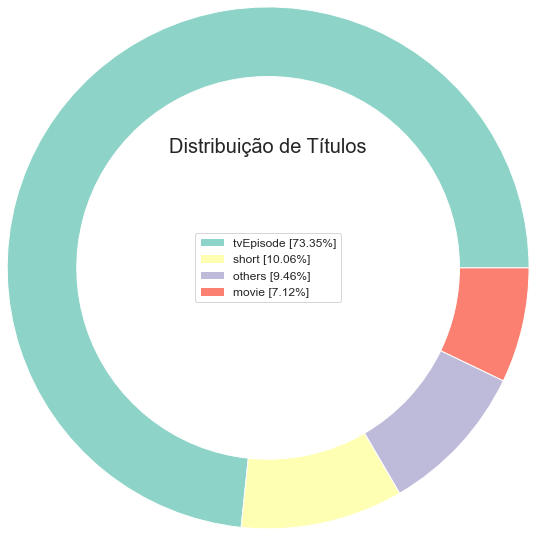

In [25]:
#Plot

#Mapa de cores
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

#Cria a figura
f = plt.figure()

#Pie Plot = grafico de rosca 
plt.pie(resultado1['COUNT'], labeldistance = 1, radius =3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20, 'fontweight':20})
plt.show()

## 2 - Qual o Número de Títulos por gênero?

*Vamos calcular o numero de filmes por genero e entregar o resultado em percentual*

In [26]:
#Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres '''

In [27]:
#Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [28]:
#Visualizando resultado
display(resultado2)

,genres,COUNT(*)
0,Action,13398
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1442,"Thriller,Western",39
1443,War,1254
1444,"War,Western",9
1445,Western,4014


In [29]:
#Converte as String para minusculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [30]:
#Removendo Valores NA ausentes
temp = resultado2['genres'].dropna()

<b>Usamos o Countvectorizer para converter a coluna gênero em um vetor one-hot encoded para contar o número de filmes em cada gênero.</b>

converte linhas e colunas com valores 1 e 0

In [31]:
#Vamos criar um vetor usando expressão regular para filtrar as strings
#docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'
#scikt-learn.org ( converte uma colecao de text em uma matriz espassa de tokens)
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [32]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [33]:
# Aplica a vetorização ao dataset sem valores NA = transforma em matrix
bag_generos = vetor.transform(temp)

In [34]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [35]:
#Retorna generos unicos
generos_unicos = vetor.get_feature_names()

In [36]:
#Cria dataframe de generos
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [37]:
#Visualiza
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1447 non-null   int64
 1   adult        1447 non-null   int64
 2   adventure    1447 non-null   int64
 3   animation    1447 non-null   int64
 4   biography    1447 non-null   int64
 5   comedy       1447 non-null   int64
 6   crime        1447 non-null   int64
 7   documentary  1447 non-null   int64
 8   drama        1447 non-null   int64
 9   family       1447 non-null   int64
 10  fantasy      1447 non-null   int64
 11  film-noir    1447 non-null   int64
 12  game-show    1447 non-null   int64
 13  history      1447 non-null   int64
 14  horror       1447 non-null   int64
 15  music        1447 non-null   int64
 16  musical      1447 non-null   int64
 17  mystery      1447 non-null   int64
 18  n            1447 non-null   int64
 19  news         1447 non-null   int64
 20  reality-

In [38]:
#Drop da coluna n
generos = generos.drop(columns = 'n', axis = 0)

In [39]:
#Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [40]:
#visualiza
generos_percentual.head(10)

drama          18.382861
comedy         16.931583
documentary    15.964064
adventure      14.858328
action         14.581894
romance        13.476158
crime          13.061507
mystery        12.577747
thriller       12.370422
fantasy        12.232205
dtype: float64

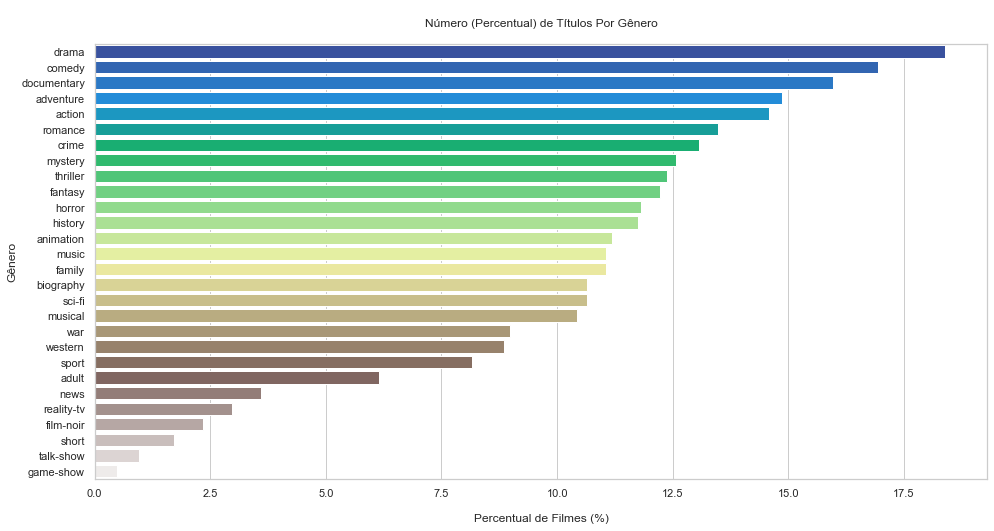

In [41]:
#Criando o grafico Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = 'h', palette = 'terrain')
plt.ylabel('Gênero')
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

# 3- Qual a Mediana de Avaliação dos Filmes Por Gênero

*Mediana de avaliação dos filmes.*

In [42]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type ='movie'  
            '''

In [43]:
#Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [44]:
#Visualiza
display(resultado3)

,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
268215,3.6,"Action,Adventure,Thriller"
268216,5.8,Thriller
268217,6.3,"Adventure,Drama,History"
268218,3.8,"Adventure,History,War"


In [45]:
# tratar generos mais de um no mesmo filme e tratar valores ausentes
#criando uma função para retornar os generos
#1 passando para minusculo, 2 deletando linhas com valores ausentes

def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos = vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [46]:
#Aplicando a Função
generos_unicos = retorna_generos(resultado3)

In [47]:
#visualiza
display(generos_unicos)

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [48]:
#criando listas vazias

#contagem de filmes por genero
genero_counts =[]
#contagem de filmes por avaliacao
genero_ratings = []

In [49]:
#loop
for item in generos_unicos:
    
    #Retorna a contagem de filmes por genero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id = titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
    
    #Retorna a avaliacao de filmes por genero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE'+'\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))
    

In [50]:
#prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings


In [51]:
#visualiza
df_genero_ratings.head(20)

,genres,count,rating
0,action,28836,5.8
1,adult,4089,5.8
2,adventure,17701,6.0
3,animation,4682,6.5
4,biography,8070,7.0
5,comedy,66840,6.0
6,crime,23098,6.1
7,documentary,39322,7.3
8,drama,119067,6.3
9,family,10179,6.3


In [52]:
#Drop do índice 18 (news)
# Não queremos essa informacao como genero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [53]:
#ordena resultado
df_genero_ratings = df_genero_ratings.sort_values(by ='rating', ascending=False)

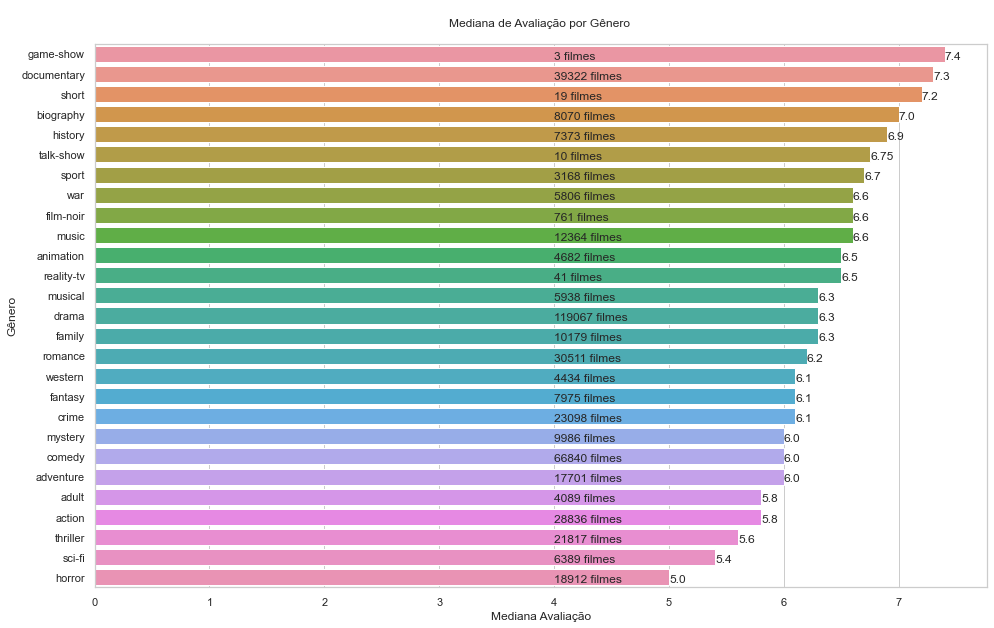

In [54]:
#Plot grafico
plt.figure(figsize = (16,10))
#Barplot
sns.barplot(y= df_genero_ratings.genres, x= df_genero_ratings.rating, orient = 'h')

#textos do grafico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0,
           i + 0.25,
           str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
           i + 0.25,
           round(df_genero_ratings['rating'][df_genero_ratings.index[i]],2))
    
plt.ylabel('Gênero')
plt.xlabel('Mediana Avaliação')
plt.title('\nMediana de Avaliação por Gênero \n')
plt.show()

# 4- Qual a Mediana de avaliação dos filmes em relação ao ano de estréia?
*Mediana de Avaliação dos Filmes.*

In [55]:
#Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM ratings
            JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            Order BY premiered
            '''

In [56]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [57]:
#Visualizando
display(resultado4)

,Rating,premiered
0,6.4,1896
1,4.4,1897
2,3.9,1899
3,3.7,1899
4,6.0,1900
...,...,...
268215,5.2,2021
268216,7.8,2021
268217,5.9,2021
268218,8.0,2021


In [58]:
#Calculamos a mediana ao do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered']== year]['Rating']))

In [59]:
type(ratings)

list

In [60]:
ratings[1:10]

[4.4, 3.8, 6.15, 4.5, 3.5, 4.6, 5.4, 4.5, 3.6]

In [61]:
#Lista de anos
anos= list(set(resultado4['premiered']))

In [62]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

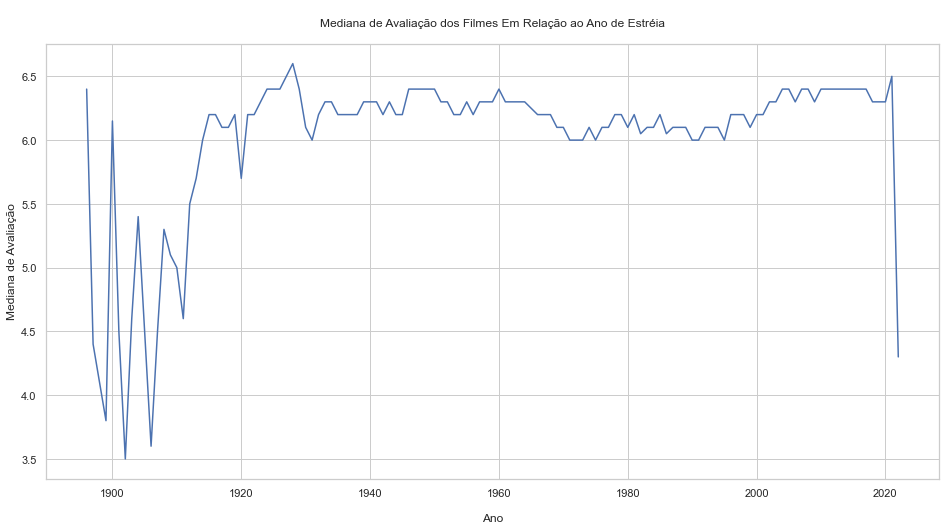

In [63]:
# PLot
plt.figure(figsize = (16,8))
plt.plot(anos,ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

# 5- Qual o número de filmes avaliados por gênero em relação ao ano de estreia?
*numero de filmes por gênero Vamos listar os Top 5*

1 - pegar todos os generos, 2-depois limpar, 3 depois fazer a conta

In [64]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles'''

In [65]:
#resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [66]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8249192,"Action,Drama,Family"
8249193,"Action,Drama,Family"
8249194,"Action,Drama,Family"
8249195,Short


In [67]:
# gerenos unicos, reaprovetiando a funcao
generos_unicos = retorna_generos(resultado5)

In [68]:
#VISUALIZANDO
display(generos_unicos)

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [69]:
# Agora fazemos a contagem

genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT (*) COUNT FROM titles WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta,conn)
    genero_count.append(resultado['COUNT'].values[0])

In [70]:
#Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [71]:
#Calcula os top 5 (usando a funcao head) ( ignorando o genero n ao inves de dropar)
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending=False)
top_generos = df_genero_count.head()['genre'].values

In [72]:
display(top_generos)

array(['drama', 'documentary', 'comedy', 'action', 'romance'],
      dtype=object)

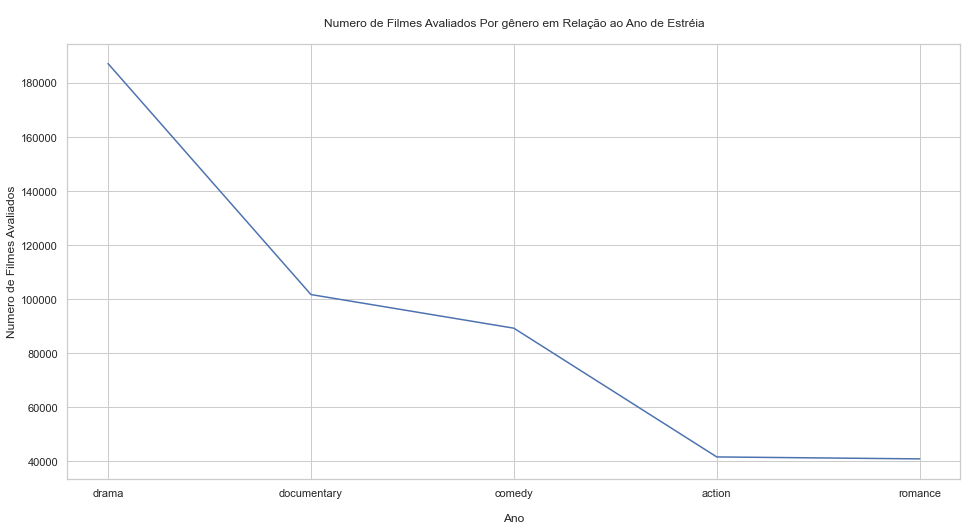

In [73]:
#Plot

#Figura
plt.figure(figsize = (16,8))

#Loop e Plot


plt.plot(df_genero_count.head()['genre'],df_genero_count.head()['Count'])
plt.xlabel('\nAno')
plt.ylabel('Numero de Filmes Avaliados')
plt.title('\nNumero de Filmes Avaliados Por gênero em Relação ao Ano de Estréia\n')
plt.show()

# 6- Qual o filme com maior tempo de duração? calcule os percentis.
*Percentis e filmes mais longo da história*

In [74]:
#Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [75]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [76]:
#Visualizando
display(resultado6)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
369692,123
369693,57
369694,100
369695,116


In [77]:
#Loop para calculo dos percentis runtime tempo em minutos
for i in range(101):
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values,val),2)
    print(f'{val} percentil da duração (runtime) é: {perc}')

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 48.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 52.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 54.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 58.0
11 percentil da duração (runtime) é: 59.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 62.0
16 percentil da duração (runtime) é: 63.0
17 percentil da duração (runtime) é: 65.0
18 percentil da duração (runtime) é: 66.0
19 percentil da duração (runtime) é: 68.0
20 percentil da duração (runtime) é: 70.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 71.0
23 percentil da duração (runtime) é: 72.0
24 

In [78]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles
            WHERE type='movie' AND Runtime !='NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            '''

In [79]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [80]:
resultado6

,Runtime,primary_title
0,51420,Logistics


# 7- Qual a relação entre duração e gênero?
*Relação entre duração do filme e gênero*

In [81]:
#Consulta SQL AVG calcula media average
consulta7 = '''
            SELECT AVG(runtime_minutes)Runtime, genres
            FROM titles
            WHERE type = 'movie'
            AND runtime_minutes !='NaN'
            GROUP BY genres
            '''

In [82]:
# Resulado
resultado7 = pd.read_sql_query(consulta7, conn)

In [83]:
display(resultado7)

,Runtime,genres
0,99.386747,Action
1,77.000000,"Action,Adult"
2,69.000000,"Action,Adult,Adventure"
3,74.000000,"Action,Adult,Comedy"
4,84.666667,"Action,Adult,Crime"
...,...,...
1359,93.928571,"Thriller,Western"
1360,93.396226,War
1361,98.000000,"War,Western"
1362,72.418773,Western


In [84]:
#Retorna generos unicos
generos_unicos = retorna_generos(resultado7)

In [85]:
#Calcula Duração por Genêro
genero_runtime = []

for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM titles WHERE genres LIKE'+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime !=\'NaN\''
    resultado = pd.read_sql_query(consulta,conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [86]:
#Preapara data Frame
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre']= generos_unicos
df_genero_runtime['runtime'] = genero_runtime


In [87]:
#Remove indice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [88]:
#ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

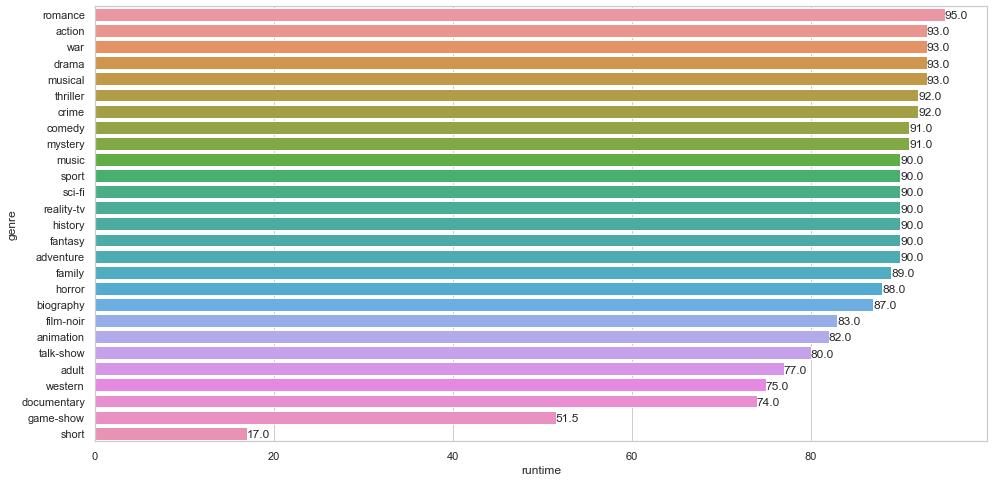

In [89]:
#Plot

#Tamanho da figura
plt.figure(figsize = (16,8))

#Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = 'h')

#Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
            i + 0.25,
            round(df_genero_runtime['runtime'][df_genero_runtime.index[i]], 2))
    
plt.ylabel =('G~enero')
plt.xlabel =('\nMediana de Tempo de Duração (Minutos)')
plt.title=('\nRelação Entre Duração e Gênero\n')
plt.show()

# 8- Qual o número de filmes produzidos por País?
*Numero de Filmes produzidos por País (tabela akas)*

In [95]:
#Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM
            akas JOIN titles ON
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            '''

In [96]:
# resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [97]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,541
2,AF,110
3,AG,12
4,AL,1234
...,...,...
229,YUCS,146
230,ZA,3043
231,ZM,11
232,ZRCD,2


In [98]:
#Shape
resultado8.shape

(234, 2)

In [99]:
#numero de linhas
resultado8.shape[0]

234

In [100]:
#listas auxiliares
nomes_paises =[]
contagem =[]

In [102]:
#loop para obter o País de acordo com a região (lib pycountry)

for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except:
        continue

In [103]:
#prepara dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country']= nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [104]:
#ordena resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending=False)

In [105]:
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,295825
65,United Kingdom,150929
96,Japan,88871
63,France,81770
89,India,73902
32,Canada,70152
47,Germany,66630
93,Italy,63640
26,Brazil,62671
58,Spain,62311


TypeError: 'str' object is not callable

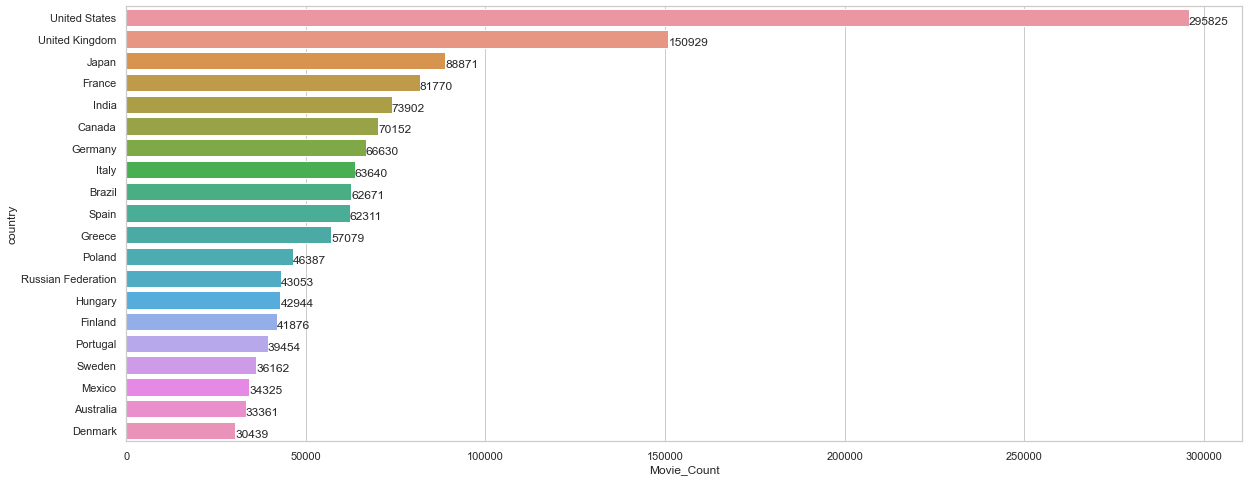

In [111]:
#Plot

#Figura
plt.figure(figsize = (20,8))

#Barplot
sns.barplot(y = df_filmes_paises[:20].country, x= df_filmes_paises[:20].Movie_Count, orient ='h')

#Loop
for i in range (0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
            i + 0.30,
            round(df_filmes_paises['Movie_Count'][df_filmes_paises.index[i]],2))
    
plt.ylabel('País')
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

# 9- Quais São os top 10 melhores filmes?
*Top 10 Filmes com melhor avaliação e mais de 25 mil votos*

In [112]:
#Consulta SQL
consulta9 ='''
            SELECT primary_title AS Movie_Name, genres, rating 
            FROM
            titles JOIN ratings
            ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10
            '''

In [113]:
#resultado
resultado9 = pd.read_sql_query(consulta9, conn)

In [114]:
#visualizando
display(resultado9)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.2
4,Soorarai Pottru,Drama,9.1
5,12 Angry Men,"Crime,Drama",9.0
6,The Godfather: Part II,"Crime,Drama",9.0
7,The Dark Knight,"Action,Crime,Drama",9.0
8,David Attenborough: A Life on Our Planet,"Biography,Documentary",9.0
9,Schindler's List,"Biography,Drama,History",8.9
